In [12]:
## 3.1 MNIST



In [13]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- descr: description of data set
- data: one row means one instance, one column means one feature
- target: labels

In [14]:
mnist['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [16]:
X, y = mnist["data"], mnist["target"]

In [17]:
type(X)

pandas.core.frame.DataFrame

We can't access row by `X[0]` because `mnist["data"]` returns `DataFrame`.
I guess it has been changed after this book published.
Then we need to convert `DataFrame` to array.

In [18]:
import numpy as np

some_digit = np.array(X)[0]

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def show_digit(idx):
  digit = np.array(X)[idx]
  digit_image = digit.reshape(28, 28)

  plt.imshow(digit_image, cmap="binary")
  plt.axis("off")
  plt.show()

  print(f"Label for row {idx} is {np.array(y)[idx]}")

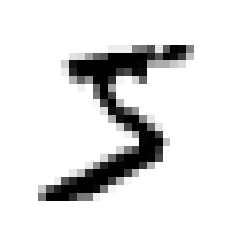

Label for row 0 is 5


In [20]:
show_digit(0)

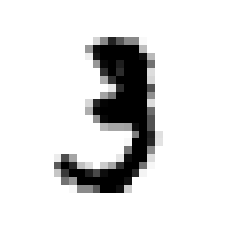

Label for row 10 is 3


In [21]:
show_digit(10)

In [22]:
# convert labels to int
y = y.astype(np.uint8)

Split training set and test set.
We need to take care not to make fold which doesn't include some figure. But this training set already shuffled, we don't take care it.

In [23]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [24]:
import joblib

joblib.dump([X, y, some_digit, X_train, X_test, y_train, y_test], "ss-03/01.pkl")
# X, y, some_digit, X_train, X_test, y_train, y_test = joblib.load("ss-03/01.pkl")

['ss-03/01.pkl']

## 3.2 Train binary classifier

To simplify our situation, we'll create binary classifier which distinct 5 or other figure.

In [4]:
y_train_5 = (y_train == 5)
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [5]:
y_test_5 = (y_test == 5)
y_test_5

60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998     True
69999    False
Name: class, Length: 10000, dtype: bool

In [6]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf

SGDClassifier(random_state=42)

In [63]:
import joblib

joblib.dump(sgd_clf, "ss-03/sgd_clf.pkl")

['ss-03/sgd_clf.pkl']

[SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
> This estimator implements regularized linear models with stochastic gradient descent (SGD) learning

SDG = 確率的勾配降下法


Predict X[0] (= 5) to be 5

In [10]:
sgd_clf.predict([some_digit])

array([ True])

Predict X[10] (= 3) not to be 5

In [25]:
sgd_clf.predict([np.array(X)[10]]) # X[10] => 3

array([False])

## 3.3 性能指標

### 3.3.1 交差検証を使った正解率の測定

K分割交差検証（2章でも出てきた）
> 訓練セットをK個のフォールドに分割し、検証用のフォールド以外のフォールドを使って訓練したモデルで検証用のフォールドを評価


In [26]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

This model (sgd_clf) scores 0.95 accuracy for each 3 folds. But we can't judge efficiency of this model only this score.

In [27]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):

  def fit(self, X, y=None):
    return self

  def predict(self, X):
    # always predict `false`
    return np.zeros((len(X), 1), dtype=bool)

In [28]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

If we create a model that always predict "not 5" scores about 90% accuracy because the dataset incudes "5" in ~10% and "non 5" in ~90%.

We should not use accuracy as performance index because it depends on dataset

We can write cross validation logic easily.

```py
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))  # prints 0.9502, 0.96565, and 0.96495
    print(n_correct / len(y_pred))  # 0.9502、0.96565、0.96495を表示
```

### 3.3.2　混同行列

We should use confusion matrix on evaluate classifier.

Before calc confusion matrix, we need a set that

In [29]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

`cross_val_predict` returns prediction result for 

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

| actual \ predict | non 5 |    5 |
|------------------|-------|------|
|            non 5 | 53892 |  687 |
|                5 |  1891 | 3530 |

Results can be regaeded like this. If the model could predict perfectly, reslut includes only true negative and true positive.

| actual \ predict | non 5 |    5 |
|------------------|-------|------|
|            non 5 | true negative | false positive |
|                5 | false negative | true positive |

We can calc `precisiion` (適合率、精度、精密度) to know the ratio of **false positive**.

```
precision = TP / (TP + FP)
```

We can calc `recall` (再現率, 感度:sensitivity, 真陽性率:true positive rate) to know the ratio of **false negative**.

```
recall = TP / (TP / FN)
```


### 3.3.3　適合率と再現率

In [31]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [32]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

Precision of the model is 83% and recall score is 65%.

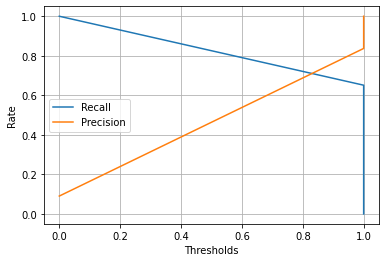

In [33]:
# plot recall and presition rato
# https://qiita.com/g-k/items/14bf10cce79f0db72b24

import matplotlib.pyplot as plt
from sklearn import metrics
precision, recall, thresholds = metrics.precision_recall_curve(y_train_5, y_train_pred)

plt.plot(np.append(thresholds, 1), recall, label = 'Recall')
plt.plot(np.append(thresholds, 1), precision, label = 'Precision')
plt.legend()
plt.xlabel('Thresholds')
plt.ylabel('Rate')
plt.grid(True)

We can use `F1 score` to show the combined score of precision and recall.

```
F1 = 2 / (1 / precision + 1 / recall)
   = 2 * (precision * recall / (precision + recall))
   = TP / (TP + (FN + FP) / 2)
```

In [34]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

`F1 score` becomes higher if both precision and recall are higher. But the model scores highest F1 score won't be a best model for every usecase.
We need to decide we put importance on precision or recall because we are not able to create model both precision and recall score higher.
- Precision is important
  - Check shoplifter
- Recall is important
  - Parental control

### 3.3.4　適合率と再現率のトレードオフ

We can retreive decision score by using decision_funcstion in SGDClassifier

In [35]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [36]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [37]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [38]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [39]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [40]:
def plot_precision_reall_vs_threashold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

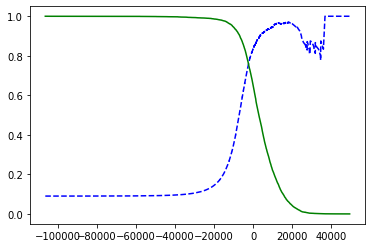

In [41]:
plot_precision_reall_vs_threashold(precisions, recalls, thresholds)
plt.show()

In [42]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.019499143958

In [43]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [44]:
# from sklearn.metrics import precision_score, recall_score

In [45]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [46]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [47]:
f1_score(y_train_5, y_train_pred_90)

0.626082771896054

### 3.3.5　ROC曲線

ROC (receiver operating characterstic) curve

Plot FPR / TPR 

= 1 - TNR

= specificity



In [48]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [49]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')

<function matplotlib.pyplot.show(close=None, block=None)>

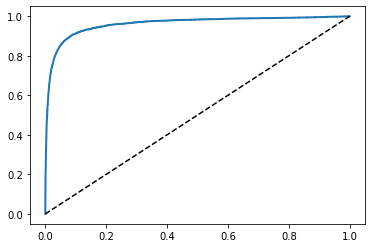

In [50]:
plot_roc_curve(fpr, tpr)
plt.show

Train RandomForestClassifire and compare ROC curve and ROC AUC score.

In [52]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_proba_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")


We use `predict_proba` method instead of `decision_function`. RandomForestClassifire does not have `decision_function` method due to it classify by instance distance.

`predict_proba` represents posibility to classified or not.

In [54]:
y_proba_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [57]:
y_scores_forest = y_proba_forest[:, 1]
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

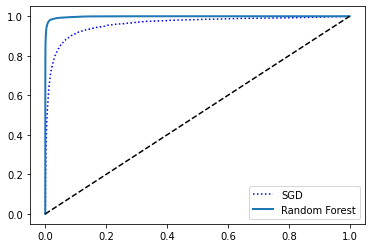

In [59]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

This graph shows that RandomForestClassifier predicts more properly than SDG classifier because ROC curve is nearer to left top corner, and has bigger AUC.

In [62]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

## 3.4 多クラス分類

We

  0 1 2 3 4 5 6 7 8 9
0
1
2
3
4
5
6
7
8
9


- 多クラス
- 多ラベル
- 多出力

[
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
]

[
  0, 0, 1, 1, 2, 200, 30, 20,
  0, 3, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
]

[
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 1, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
  0, 0, 0, 1, 2, 200, 30, 20,
]